<a href="https://colab.research.google.com/github/iam-ajitkumartoppo/airbnb-booking-analysis/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing airbnb datasheet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath='/content/drive/MyDrive/Data/Airbnb/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(filepath)

## Exploring Airbnb Data

In [ ]:
airbnb_df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### We see that there are 2 anamalies:
1)  The minimim of price is zero, this is not possible.

2)  The minimum of availibilty is zero and 25% of it's data have 0 zero entries

In [ ]:
# Exploring zero price

zero_price=airbnb_df.loc[airbnb_df['price']==0]
zero_price.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


The above data consists of all the listings which have zero price, there seems to be no reason why 0 is entered in the price column, so we replace it by mean of price corresponding to that neighbourhood_group.

In [ ]:
# replacing 0 by mean corresponding to the neighbourhood group
airbnb_df['price']=airbnb_df.groupby('neighbourhood_group').apply(lambda x: x['price'].replace(0,x['price'].mean())).reset_index().sort_values(by='level_1').set_index('level_1')['price']
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.749398,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.143815,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Now let us look into Availibilty column

In [ ]:
airbnb_df.loc[airbnb_df['availability_365']==0].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120.0,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299.0,3,9,2011-12-28,0.07,1,0


The above data shows the entries in which 'availibility_365' is zero, and from 'last_review' column we see that these listings are before 2019 so these listings might be out of buisness with airbnb.

##Exploring Null values

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# counting null values in each column
airbnb_df.isna().sum(axis=0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We see that 'name', 'host_id', 'last_review', 'reviews_per_month' columns have null values, columns 'last_review', 'reviews_per_month' have large number of null values

In [ ]:
# let us explore why these columns have large null values
airbnb_df.loc[airbnb_df['reviews_per_month'].isna()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190.0,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80.0,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35.0,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150.0,1,0,NaN,NaN,1,365


When we look at the data in which the columns 'reviews_per_month' has null values it is because number_of_reviews correponding to that is zero so we fill null values with zero 

In [ ]:
airbnb_df['reviews_per_month'].fillna(0,inplace=True)
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,0.00,6,2


### Highest number of apartments owned by the host

In [ ]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,0.00,6,2


In [ ]:
highest_apartments_count=airbnb_df.groupby(['host_id','host_name']).count()['id'].sort_values(ascending=False).reset_index().drop(columns='host_id').set_index('host_name').head(10)

Text(0, 0.5, 'Total counts')

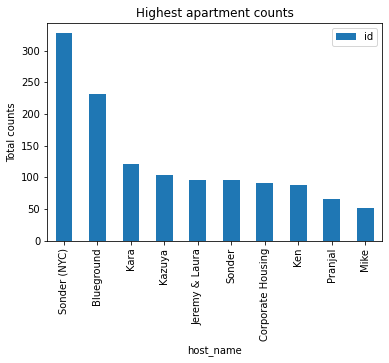

In [ ]:
highest_apartments_count.plot.bar()
plt.title('Highest apartment counts')
plt.ylabel('Total counts')

From the above plot we see the top 10 hosts owning highest number of apartments,Sonder(NYC) has highest apartments with total 327 counts.

In [ ]:
airbnb_df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               676
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Top rated Listings based on reviews

In [ ]:
top_rated_hotels=airbnb_df.groupby(['name'])['number_of_reviews'].max().sort_values(ascending=False).head(5)
top_rated_hotels

name
Room near JFK Queen Bed           629
Great Bedroom in Manhattan        607
Beautiful Bedroom in Manhattan    597
Private Bedroom in Manhattan      594
Room Near JFK Twin Beds           576
Name: number_of_reviews, dtype: int64

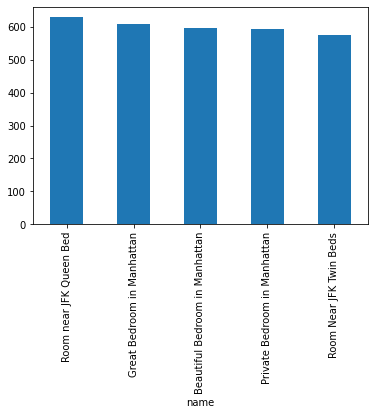

In [ ]:
top_rated_hotels.plot.bar()

In [ ]:
top_rated_hotels=airbnb_df.groupby(['name'])['number_of_reviews'].max().sort_values(ascending=False).head(5)

name
Room near JFK Queen Bed           629
Great Bedroom in Manhattan        607
Beautiful Bedroom in Manhattan    597
Private Bedroom in Manhattan      594
Room Near JFK Twin Beds           576
Name: number_of_reviews, dtype: int64

### Top 10 neighbourhood having highest number of apartments

In [ ]:
top_neighbourhood_apartments=airbnb_df['neighbourhood'].value_counts()
top_neighbourhood_apartments

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

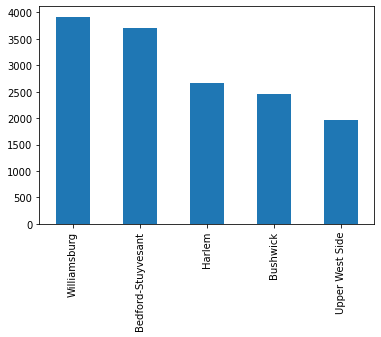

In [ ]:
top_neighbourhood_apartments.head().plot.bar()

### Top Host based on total number of reviews

In [ ]:
top_hosts=airbnb_df.groupby('host_id')['number_of_reviews'].mean()
top_hosts.sort_values(ascending=False).head(10)


host_id
47621202    602.500000
4734398     599.333333
2369681     540.000000
12949460    488.000000
792159      480.000000
37312959    454.600000
2321321     454.000000
277379      448.500000
307962      441.000000
97086824    434.000000
Name: number_of_reviews, dtype: float64

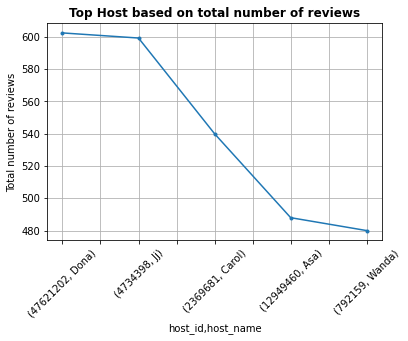

In [ ]:
top_hosts=airbnb_df.groupby(['host_id','host_name'])['number_of_reviews'].mean()
top_hosts=top_hosts.sort_values(ascending=False).head(5)
top_hosts.plot(kind='line',marker='.',rot=45,)
plt.title('Top Host based on total number of reviews',fontweight="bold")
plt.ylabel('Total number of reviews')
plt.grid()

plt.show()

In [ ]:
# which neighbourhood_group in average has highest number of reviews
airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)

neighbourhood_group
Staten Island    30.941019
Queens           27.700318
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Name: number_of_reviews, dtype: float64

In [ ]:
# which neighbourhood in average has highest number of reviews
df=airbnb_df.groupby(['neighbourhood','neighbourhood_group'])['number_of_reviews'].mean().sort_values(ascending=False).reset_index().head(10)
#df=df.loc[:,['neighbourhood','neighbourhood_group','number_of_reviews']]
df

,neighbourhood,neighbourhood_group,number_of_reviews
0,Silver Lake,Staten Island,118.500000
1,East Elmhurst,Queens,81.659459
2,Richmondtown,Staten Island,79.000000
3,Eltingville,Staten Island,76.000000
4,Mount Eden,Bronx,70.000000
5,Springfield Gardens,Queens,69.094118
6,Tompkinsville,Staten Island,57.142857
7,Huguenot,Staten Island,55.666667
8,Manhattan Beach,Brooklyn,50.625000
9,Highbridge,Bronx,48.814815


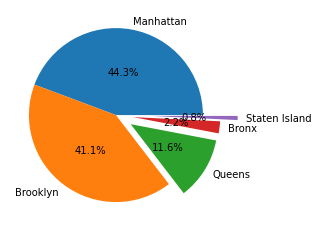

In [ ]:
airbnb_df['neighbourhood_group'].value_counts()
plt.pie(airbnb_df['neighbourhood_group'].value_counts(),labels=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'],explode=[0,0,0.2,0.2,0.4],autopct='%.1f%%',pctdistance=0.5)
plt.show()

In [ ]:
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

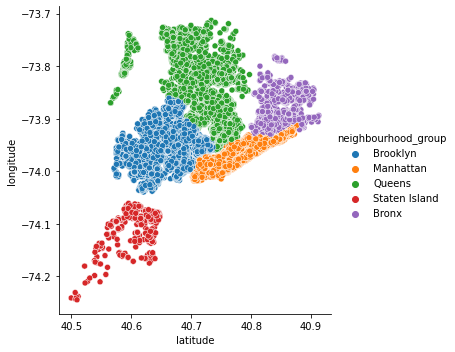

In [ ]:
sns.relplot(x='latitude',y='longitude',data=airbnb_df,hue ='neighbourhood_group')

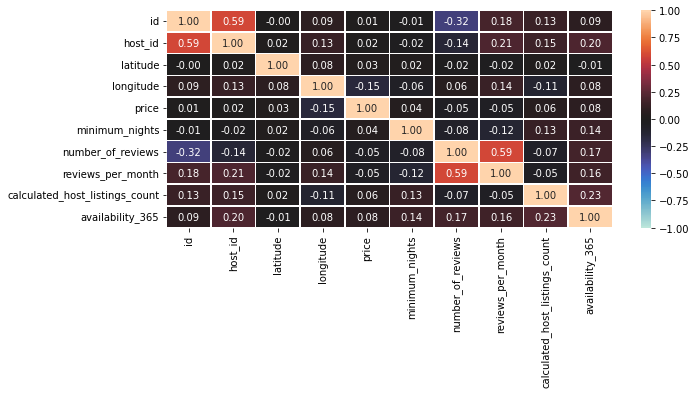

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(airbnb_df.corr(),annot=True,fmt='.2f',vmax=1,vmin=-1,center=0,linecolor='white',linewidth=0.5)

Top neighbourhood in NYC with respect to average price/night

In [ ]:

top_neighbourhood=airbnb_df.groupby(['neighbourhood','neighbourhood_group'])['price'].mean().sort_values(ascending=False).reset_index().head(10)
top_neighbourhood

,neighbourhood,neighbourhood_group,price
0,Fort Wadsworth,Staten Island,800.000000
1,Woodrow,Staten Island,700.000000
2,Tribeca,Manhattan,490.638418
3,Sea Gate,Brooklyn,487.857143
4,Riverdale,Bronx,442.090909
5,Prince's Bay,Staten Island,409.500000
6,Battery Park City,Manhattan,367.557143
7,Flatiron District,Manhattan,341.925000
8,Randall Manor,Staten Island,336.000000
9,NoHo,Manhattan,295.717949


In [ ]:
# Arrangement of neighbourhood groups based on price
airbnb_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        196.884903
Brooklyn         124.438890
Staten Island    114.812332
Queens            99.517649
Bronx             87.576991
Name: price, dtype: float64

Room types vs price on different neighbourhood groups

In [ ]:
price_roomtypes=airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
price_roomtypes

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.922541
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.340557
4,Brooklyn,Private room,76.573756
5,Brooklyn,Shared room,51.130185
6,Manhattan,Entire home/apt,249.254025
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


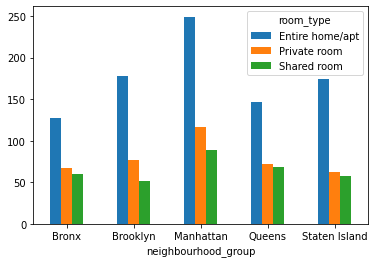

In [ ]:
price_roomtypes.pivot(index='neighbourhood_group',columns='room_type',values='price').plot.bar(rot=0)
plt.show()

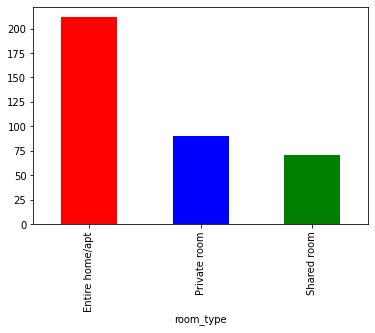

In [ ]:
# price variation wrt room_types
price_variation=airbnb_df.groupby('room_type')['price'].mean()
price_variation.plot.bar(color=['red','blue','green'])
plt.show()

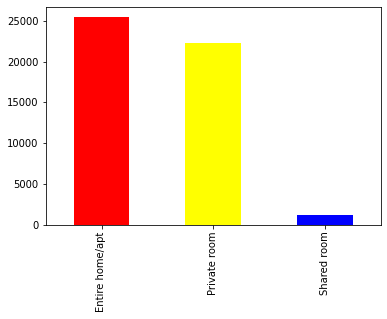

In [ ]:
# distribution of room types wrt counts
room_counts=airbnb_df['room_type'].value_counts()
room_counts.plot.bar(color=['red','yellow','blue'])

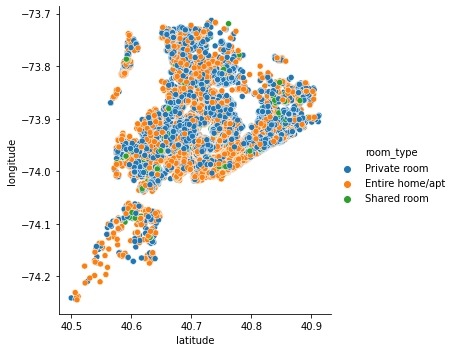

In [ ]:
sns.relplot(x='latitude',y='longitude',data=airbnb_df,hue ='room_type')

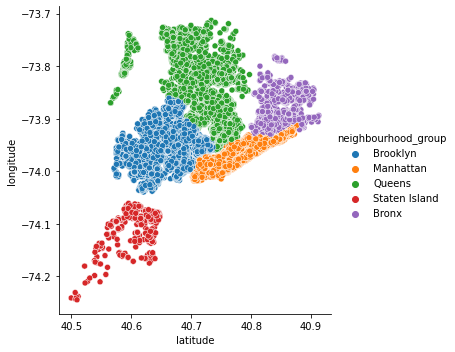

In [ ]:
sns.relplot(x='latitude',y='longitude',data=airbnb_df,hue ='neighbourhood_group')

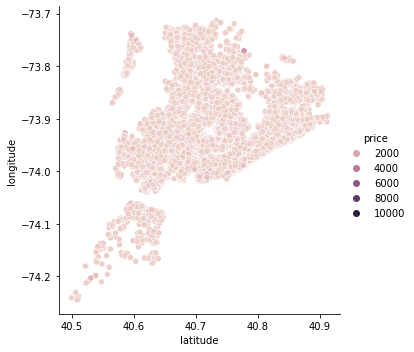

In [ ]:
sns.relplot(x='latitude',y='longitude',data=airbnb_df,hue ='price')

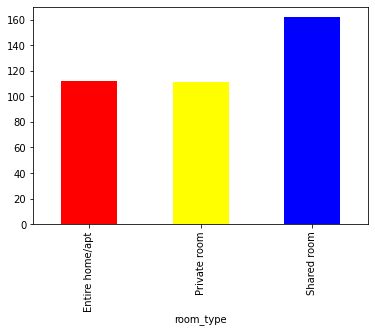

In [ ]:
# room types and their relation with availibilty
availibilty_rooms=airbnb_df.groupby('room_type')['availability_365'].mean()
availibilty_rooms.plot.bar(color=['red','yellow','blue'])

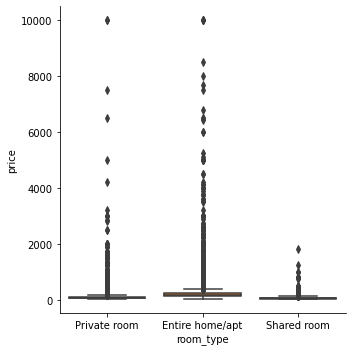

In [ ]:
# Look for some outliers in price
sns.catplot(x='room_type',y='price',data=airbnb_df, kind='box')

In [ ]:
df=airbnb_df[airbnb_df['price']>2000].sort_values(by='price',ascending=False).head(10)
df.sort_values(by='last_review',ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500.0,30,2,2018-09-18,0.18,1,251
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000.0,5,5,2017-07-27,0.16,1,0
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000.0,1,1,2016-09-15,0.03,11,365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000.0,100,2,2016-02-13,0.04,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999.0,99,6,2016-01-01,0.14,1,83
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999.0,5,1,2015-01-02,0.02,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000.0,30,0,NaN,0.00,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999.0,30,0,NaN,0.00,1,365
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703.0,1,0,NaN,0.00,12,146
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500.0,1,0,NaN,0.00,1,364


In [ ]:
airbnb_df[airbnb_df['minimum_nights']>=100]['minimum_nights'].sort_values(ascending=False)
airbnb_df[airbnb_df['minimum_nights']==1250]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180.0,1250,2,2014-11-09,0.03,1,365
